To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"..\data\customer_booking.csv", encoding="latin-1")

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

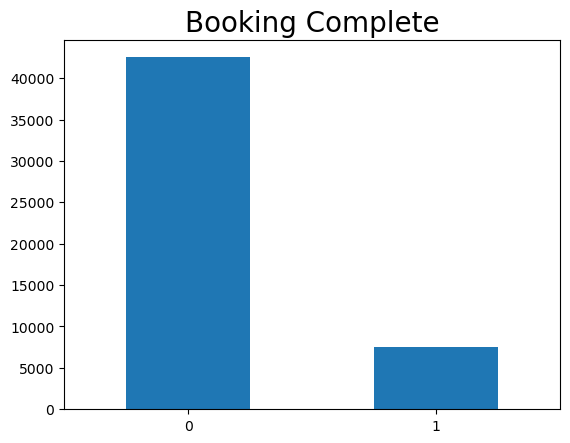

In [73]:
df.booking_complete.value_counts().plot(kind = "bar")
plt.xticks(rotation = 0)
plt.title("Booking Complete", fontsize = 20)
plt.savefig("label_distribution.png", transparent = True)
plt.show()

In [6]:
df.flight_day.unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
# Encoding day of the week.
mapping = {"Sun": 1, "Mon": 2, "Tue": 3, "Wed": 4, "Thu": 5, "Fri": 6, "Sat": 7}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df.head(30)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,7,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,7,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,4,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,7,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,4,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,5,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,5,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,2,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,2,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,1,AKLDEL,India,0,0,0,5.52,0


In [9]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [10]:
# Converting string objects into categories

for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   num_passengers         50000 non-null  int64   
 1   sales_channel          50000 non-null  category
 2   trip_type              50000 non-null  category
 3   purchase_lead          50000 non-null  int64   
 4   length_of_stay         50000 non-null  int64   
 5   flight_hour            50000 non-null  int64   
 6   flight_day             50000 non-null  int64   
 7   route                  50000 non-null  category
 8   booking_origin         50000 non-null  category
 9   wants_extra_baggage    50000 non-null  int64   
 10  wants_preferred_seat   50000 non-null  int64   
 11  wants_in_flight_meals  50000 non-null  int64   
 12  flight_duration        50000 non-null  float64 
 13  booking_complete       50000 non-null  int64   
dtypes: category(4), float64(1), int64(9)
m

In [12]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int8   
 2   trip_type              50000 non-null  int8   
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  int16  
 8   booking_origin         50000 non-null  int8   
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int16(1), int64(9), int8(3)
memory usag

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [15]:
X = df.drop("booking_complete", axis = 1)
y = df["booking_complete"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
rf.score(X_test, y_test)

0.8547

In [19]:
matrix = confusion_matrix(y_test, rf.predict(X_test))

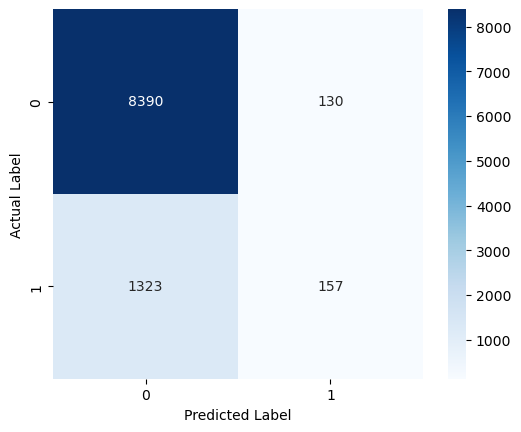

In [20]:
sns.heatmap(matrix, square = True, annot = True, fmt = "g", cmap ="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [21]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.55      0.11      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.55      0.55     10000
weighted avg       0.82      0.85      0.81     10000



### Imbalance handling

Labels distribution is extremely imbalanced, so we will try to do some operations over the dataset to reach an higher performance.

* Undersampling or Oversampling
* Consider metrics like f1 score
* Try other estimators

We will work with python library `imbalanced-learn`

In [22]:
!pip install imbalanced-learn

In [23]:
import imblearn

In [24]:
print(imblearn.__version__)

0.10.0


In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
oversample = RandomOverSampler(sampling_strategy = "not majority", random_state = 42)

In [27]:
X_over, y_over = oversample.fit_resample(X, y)

In [28]:
X_otrain, X_otest, y_otrain, y_otest = train_test_split(X_over, y_over, test_size = 0.2)

In [29]:
rf_over = RandomForestClassifier(random_state=42)

In [30]:
rf_over.fit(X_otrain, y_otrain)

RandomForestClassifier(random_state=42)

In [31]:
rf_over.score(X_otest, y_otest)

0.9610794285378329

<AxesSubplot: >

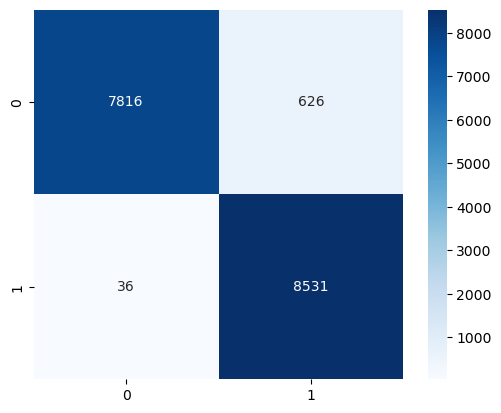

In [32]:
con_mat = confusion_matrix(y_otest, rf_over.predict(X_otest))

sns.heatmap(con_mat, square = True, fmt = "g", annot = True, cmap = "Blues")

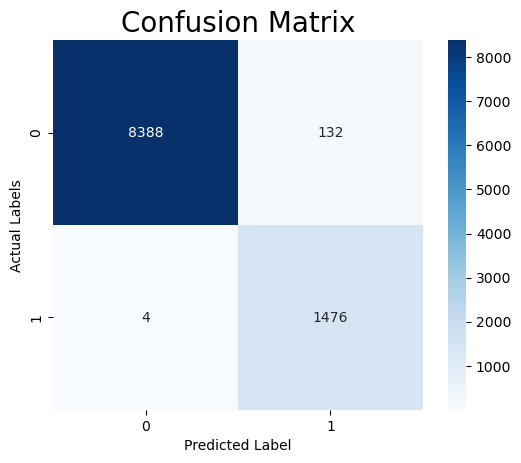

In [72]:
con_mat1 = confusion_matrix(y_test, rf_over.predict(X_test))

sns.heatmap(con_mat1, annot=True, square=True, fmt = "g", cmap= "Blues")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix", fontsize = 20)
plt.savefig("matrix.png", transparent = True)
plt.show()

## Evaluating model performance

* Cross Validation
* f1 score
* Recall score

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, roc_curve, roc_auc_score


In [46]:
rf_cross = RandomForestClassifier(random_state = 42)
f1_score = cross_val_score(rf_cross, X_over, y_over, cv = 5, scoring = "f1")
recall = cross_val_score(rf_cross, X_over, y_over, cv = 5, scoring = "recall")
precision = cross_val_score(rf_cross, X_over, y_over, cv = 5, scoring = "precision")

## Feature Importance

In [66]:
importance = pd.Series(rf_over.feature_importances_, index = X_over.columns)
importance.sort_values(inplace = True)

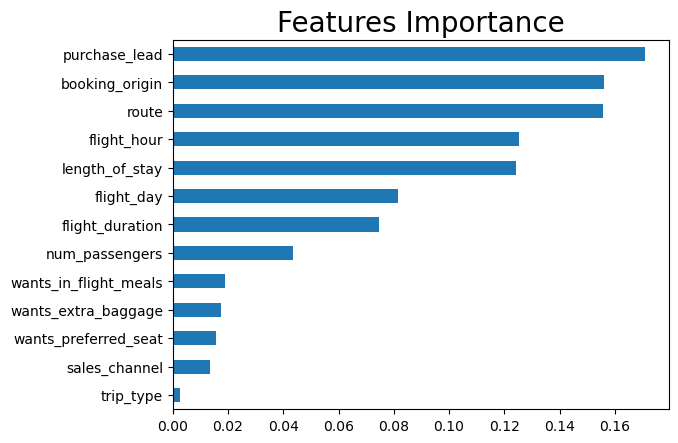

In [74]:
importance.plot(kind = "barh")
plt.title("Features Importance", fontsize = 20)
plt.savefig("importance.png", transparent = True, bbox_inches = "tight")
plt.show()